# Getting started

Install the requirements:

In [101]:
!python3 -m pip install -r requirements.txt -q

You should consider upgrading via the '/Users/ozlemyildiz/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [102]:
import kaggle_environments
from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
from kaggle_environments import evaluate, make, utils

## Random

In [116]:
from kaggle_environments.envs.hungry_geese.hungry_geese import Observation, Configuration, Action, row_col
from kaggle_environments import evaluate, make, utils
import numpy as np
actions = np.array(["EAST", "SOUTH", "NORTH", "WEST"])
opp_actions = {'EAST': 'WEST', 'WEST': 'EAST', 'NORTH':'SOUTH', 'SOUTH':'NORTH'}

# Creates a class for an agent so we can keep track of the last action
class RandomAgent:
    def __init__(self, configuration: Configuration):
        self.configuration = configuration
        self.last_action = None

    def __call__(self, observation: Observation):
        action = np.random.choice(actions) 
        while action == opp_actions.get(self.last_action, ""):
            action = np.random.choice(actions)
        self.last_action = action
        return action

cached_random_agents = {}
def random_agent(obs, config):
    index = obs["index"]
    if index not in cached_random_agents:
        cached_random_agents[index] = RandomAgent(Configuration(config))
    return cached_random_agents[index](Observation(obs))

## Greedy

In [104]:
from kaggle_environments.envs.hungry_geese.hungry_geese import GreedyAgent
cached_greedy_agents = {}

def greedy_agent(obs, config):
    index = obs["index"]
    if index not in cached_greedy_agents:
        cached_greedy_agents[index] = GreedyAgent(Configuration(config))
    return cached_greedy_agents[index](Observation(obs))


The agent colors are: White, Blue, Green, Red 

## Trained Agents

In [105]:
# The dqn agent is in the python file since it's source code is quite long
dqn_agent_1 = "agent_dqn_1_1.py"
dqn_agent_2 = "agent_dqn_1_2.py"
dqn_agent_3 = "agent_dqn_1_3.py"
dqn_agent_multi = "agent_dqn_1_multi.py"
ppo_agent = "agent_ppo.py"


In [4]:
env = make("hungry_geese", debug=True) # Set debug to False if you don't want the printed statements (or just remove the prints in the agent)
#env.run([dqn_agent_1, dqn_agent_2, dqn_agent_3, dqn_agent_multi])
#env.run(agents = [dqn_agent_1, dqn_agent_ppo, greedy_agent])
#env.render(mode="ipython", width=500, height=450)

NameError: name 'make' is not defined

In [48]:
environment = "hungry_geese"
configuration = {"rows": 11, "columns": 7}
steps = []

# Which agents to run repeatedly.  Same as env.run(agents)
agents = [dqn_agent_1, dqn_agent_2, dqn_agent_3, dqn_agent_multi]

# How many times to run them.
num_episodes = 1000

rewards = evaluate(environment, agents, configuration, steps, num_episodes)


(1000, 4)


Text(0.5, 1.0, 'Agent Comparison')

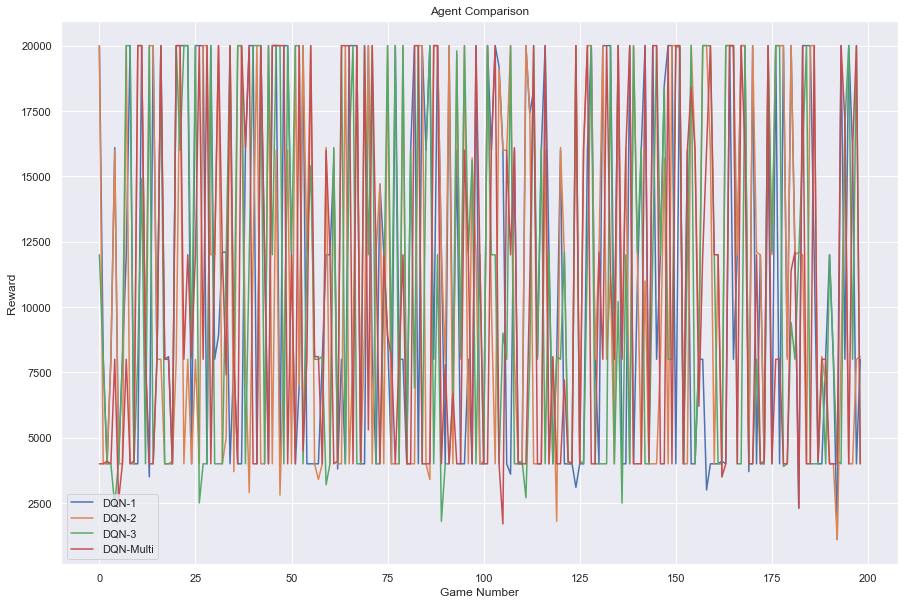

In [49]:
import matplotlib.pyplot as plt

rewards = np.array(rewards)
print(rewards.shape)

fig = plt.figure(figsize=(15,10))

plt.plot(rewards[1:200,0])
plt.plot(rewards[1:200,1])
plt.plot(rewards[1:200,2])
plt.plot(rewards[1:200,3])

plt.legend(['DQN-1', 'DQN-2' , 'DQN-3', 'DQN-Multi'])
plt.xlabel('Game Number')
plt.ylabel('Reward')
plt.title('Agent Comparison')

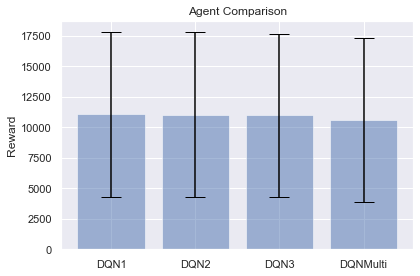

In [50]:
agents = ['DQN1','DQN2', 'DQN3', 'DQNMulti']
x_pos = np.arange(len(agents))
#mean1 = np.mean(rewards[:,0])
#mean2 = np.mean(rewards[:,1])
#mean3 = np.mean(rewards[:,2])
#mean4 = np.mean(rewards[:,3])

#std1 = np.std(rewards[:,0])
#std3 = np.std(rewards[:,2])
#std4 = np.std(rewards[:,3])


#means = [mean1,  mean3, mean4]
#stds = [std1, std3, std4]

means = np.mean(rewards, 0)
stds = np.std(rewards, 0)

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Reward')
ax.set_xticks(x_pos)
ax.set_xticklabels(agents)
ax.set_title('Agent Comparison')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('mean-std')
plt.show()

Text(0.5, 0, 'Moving Window Number')

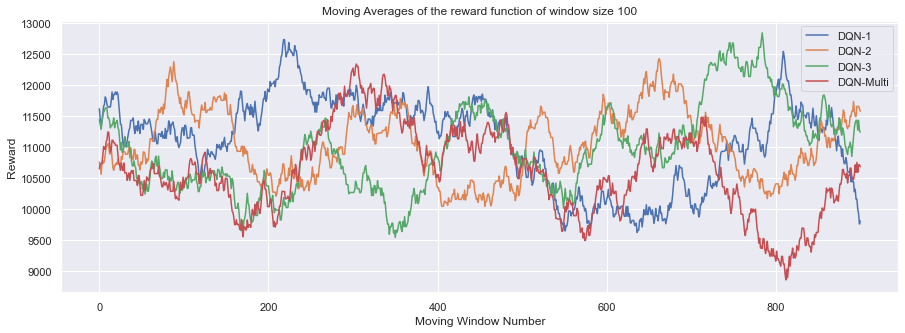

In [51]:
dqn1 = np.convolve(rewards[:,0],np.ones(100,dtype=int),'valid')/100
dqn3 = np.convolve(rewards[:,2],np.ones(100,dtype=int),'valid')/100
dqnmulti = np.convolve(rewards[:,3],np.ones(100,dtype=int),'valid')/100
dqn2 = np.convolve(rewards[:,1],np.ones(100,dtype=int),'valid')/100


fig = plt.figure(figsize=(15,5))
plt.plot(dqn1)
plt.plot(dqn2)
plt.plot(dqn3)
plt.plot(dqnmulti)
plt.title('Moving Averages of the reward function of window size 100')
plt.legend(['DQN-1', 'DQN-2' , 'DQN-3', 'DQN-Multi'])
plt.ylabel('Reward')
plt.xlabel('Moving Window Number')

In [106]:
import collections
def simulate_winner(agents, num_episodes=100, debug=False):
    n_agents = len(agents)
    scores = np.zeros((n_agents, n_agents), dtype=np.int)
    
    print("Simulation of battles. It can take some time...")
    for ind_1 in range(n_agents):
        for ind_2 in range(ind_1 + 1, n_agents):
        #for ind_2 in range(n_agents):
            if debug:
                print(f"LOG: {agents[ind_1]} vs {agents[ind_2]}")
            
            current_score = evaluate(
                "hungry_geese", 
                [
                    agents[ind_1], 
                    agents[ind_2], 
                ],
                num_episodes=num_episodes,
            )

            episode_winners = np.argmax(current_score, axis=1)
            episode_winner_counts = collections.Counter(episode_winners)
            scores[ind_1, ind_2] = episode_winner_counts.get(0, 0)
            scores[ind_2, ind_1] = episode_winner_counts.get(1, 0)
            # return current_score, episode_winners, episode_winner_counts, scores
        if debug:
            print()
    return scores

In [107]:
import pandas as pd
import seaborn as sns
sns.set()

def visualize_scores(scores, x_agents, y_agents, title):
    df_scores = pd.DataFrame(
        scores, 
        index=x_agents, 
        columns=y_agents,
    )

    plt.figure(figsize=(5, 5))
    sns.heatmap(
        df_scores, annot=True, cbar=True, 
        cmap='coolwarm', linewidths=1, 
        linecolor='black', fmt="d",
        cbar_kws={'label': "Amount of wins"}
    )
    plt.xlabel("Loser")
    plt.ylabel("Winner")
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.title(title, fontsize=18)
    
    plt.show()


In [108]:
%%time
scores = simulate_winner([dqn_agent_1,dqn_agent_2,  dqn_agent_3, dqn_agent_multi, ppo_agent, greedy_agent, random_agent])

Simulation of battles. It can take some time...
CPU times: user 8min 48s, sys: 5.6 s, total: 8min 54s
Wall time: 9min 15s


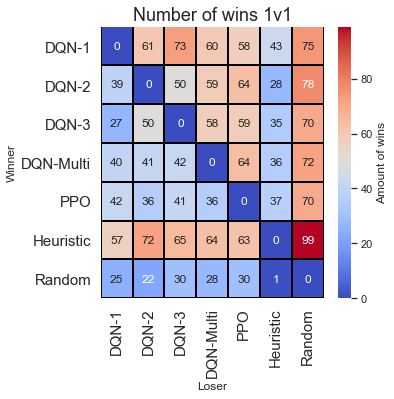

In [109]:
list_names = ['DQN-1','DQN-2', 'DQN-3', 'DQN-Multi', 'PPO', 'Heuristic', 'Random']
visualize_scores(scores, list_names, list_names, "Number of wins 1v1")

In [ ]:
def simulate_opponent(agents, num_episodes=100)
    environment = "hungry_geese"
    configuration = {"rows": 11, "columns": 7}
    wins = np.zeros((3, num_episodes))


for i in range(5):
    agent_check = [agents[i], greedy_agent]
    rewards = evaluate(environment, agent_check, configuration, steps, num_episodes)
    rewards =np.array(rewards)
    agent_rewards[i, :] = rewards[:, 0]
    

In [92]:
environment = "hungry_geese"
configuration = {"rows": 11, "columns": 7}
steps = []

# Which agents to run repeatedly.  Same as env.run(agents)
agents = [dqn_agent_1, dqn_agent_ppo, greedy_agent]

# How many times to run them.
num_episodes = 1000

rewards2 = evaluate(environment, agents, configuration, steps, num_episodes)


(1000, 3)


Text(0.5, 1.0, 'Agent Comparison')

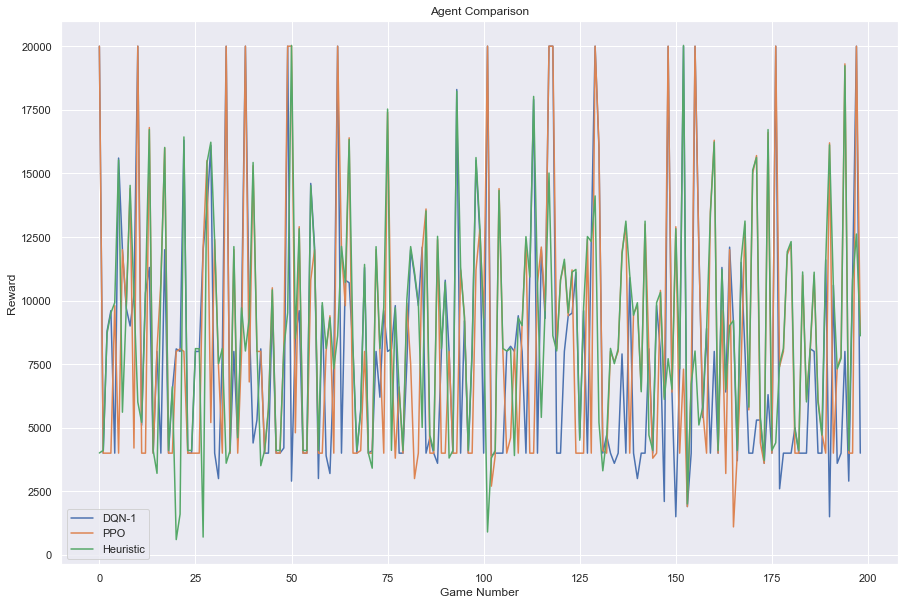

In [93]:
import matplotlib.pyplot as plt

rewards2 = np.array(rewards2)
print(rewards2.shape)

fig = plt.figure(figsize=(15,10))

plt.plot(rewards2[1:200,0])
plt.plot(rewards2[1:200,1])
plt.plot(rewards2[1:200,2])

plt.legend(['DQN-1', 'PPO', 'Heuristic'])
plt.xlabel('Game Number')
plt.ylabel('Reward')
plt.title('Agent Comparison')

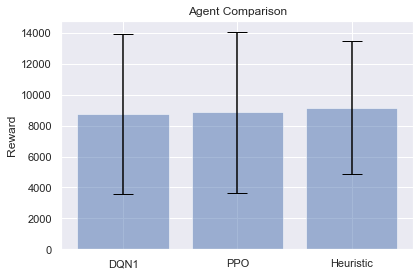

In [94]:
agents = ['DQN1','PPO', 'Heuristic']
x_pos = np.arange(len(agents))

means = np.mean(rewards2, 0)
stds = np.std(rewards2, 0)

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Reward')
ax.set_xticks(x_pos)
ax.set_xticklabels(agents)
ax.set_title('Agent Comparison')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('mean-std')
plt.show()

Text(0.5, 0, 'Moving Window Number')

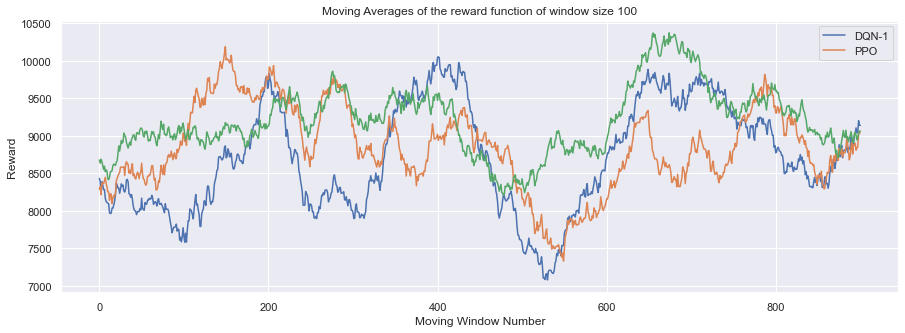

In [95]:
dqn1 = np.convolve(rewards2[:,0],np.ones(100,dtype=int),'valid')/100
ppo = np.convolve(rewards2[:,1],np.ones(100,dtype=int),'valid')/100
heu = np.convolve(rewards2[:,2],np.ones(100,dtype=int),'valid')/100


fig = plt.figure(figsize=(15,5))
plt.plot(dqn1)
plt.plot(ppo)
plt.plot(heu)
plt.title('Moving Averages of the reward function of window size 100')
plt.legend(['DQN-1', 'PPO'])
plt.ylabel('Reward')
plt.xlabel('Moving Window Number')

In [80]:
environment = "hungry_geese"
configuration = {"rows": 11, "columns": 7}
steps = []

# Which agents to run repeatedly.  Same as env.run(agents)
agents = [dqn_agent_1, dqn_agent_2, dqn_agent_3, dqn_agent_multi, dqn_agent_ppo ]

# How many times to run them.
num_episodes = 1000
agent_rewards = np.zeros((5, num_episodes))

for i in range(5):
    agent_check = [agents[i], greedy_agent, greedy_agent]
    rewards = evaluate(environment, agent_check, configuration, steps, num_episodes)
    rewards =np.array(rewards)
    agent_rewards[i, :] = rewards[:, 0]

Text(0.5, 1.0, 'Agent Comparison')

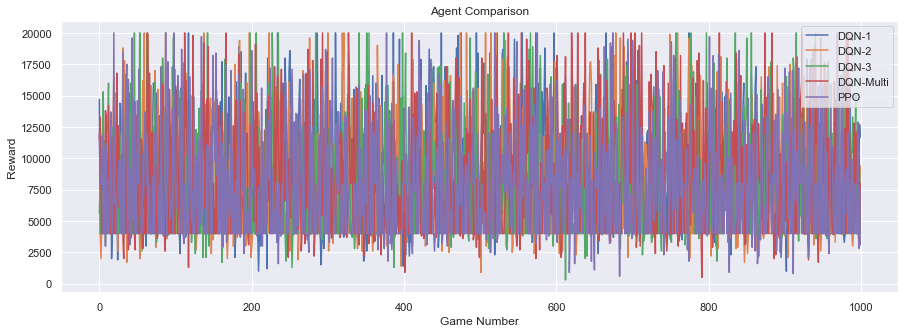

In [81]:

fig = plt.figure(figsize=(15,5))
plt.plot(agent_rewards[0, :])
plt.plot(agent_rewards[1, :])
plt.plot(agent_rewards[2, :])
plt.plot(agent_rewards[3, :])
plt.plot(agent_rewards[4, :])


plt.legend(['DQN-1','DQN-2', 'DQN-3', 'DQN-Multi', 'PPO'])
plt.xlabel('Game Number')
plt.ylabel('Reward')
plt.title('Agent Comparison')

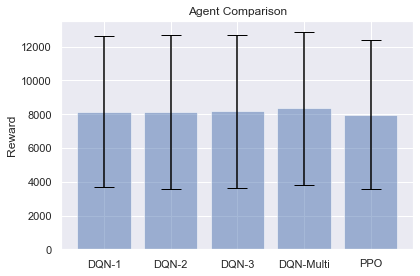

In [82]:
agents = ['DQN-1','DQN-2', 'DQN-3', 'DQN-Multi', 'PPO']
x_pos = np.arange(len(agents))

means = np.mean(agent_rewards, 1)
stds = np.std(agent_rewards, 1)

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Reward')
ax.set_xticks(x_pos)
ax.set_xticklabels(agents)
ax.set_title('Agent Comparison')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('mean-std')
plt.show()

Text(0.5, 0, 'Moving Window Number')

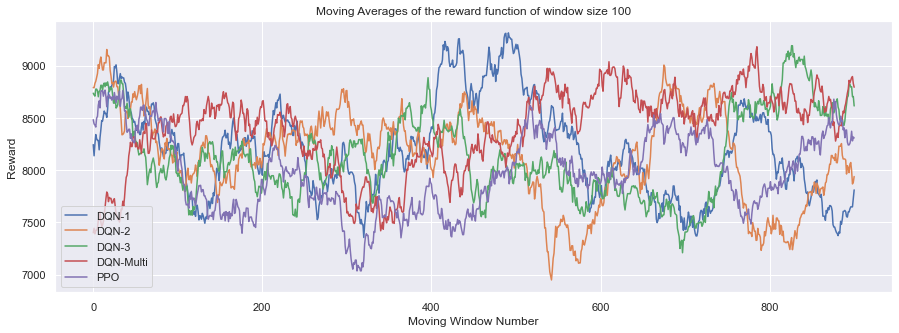

In [84]:
dqn1 = np.convolve(agent_rewards[0,:],np.ones(100,dtype=int),'valid')/100
dqn2 = np.convolve(agent_rewards[1,:],np.ones(100,dtype=int),'valid')/100
dqn3 = np.convolve(agent_rewards[2,:],np.ones(100,dtype=int),'valid')/100
dqnmulti = np.convolve(agent_rewards[3,:],np.ones(100,dtype=int),'valid')/100
dqnppo = np.convolve(agent_rewards[4,:],np.ones(100,dtype=int),'valid')/100



fig = plt.figure(figsize=(15,5))
plt.plot(dqn1)
plt.plot(dqn2)
plt.plot(dqn3)
plt.plot(dqnmulti)
plt.plot(dqnppo)
plt.title('Moving Averages of the reward function of window size 100')
plt.legend(['DQN-1','DQN-2', 'DQN-3', 'DQN-Multi', 'PPO'])
plt.ylabel('Reward')
plt.xlabel('Moving Window Number')

In [85]:
environment = "hungry_geese"
configuration = {"rows": 11, "columns": 7}
steps = []

# Which agents to run repeatedly.  Same as env.run(agents)
agents = [dqn_agent_ppo, greedy_agent, random_agent]

# How many times to run them.
num_episodes = 1000

rewards = evaluate(environment, agents, configuration, steps, num_episodes)


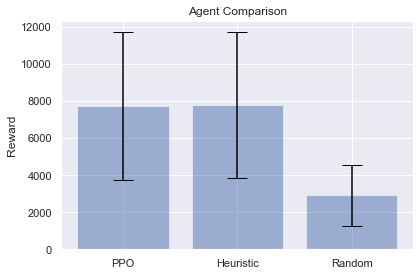

In [88]:
rewards =np.array(rewards)
means = np.mean(rewards, 0)
stds = np.std(rewards, 0)
agents = ['PPO', 'Heuristic', 'Random']
x_pos = np.arange(len(agents))



# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Reward')
ax.set_xticks(x_pos)
ax.set_xticklabels(agents)
ax.set_title('Agent Comparison')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('mean-std')
plt.show()

Text(0.5, 0, 'Moving Window Number')

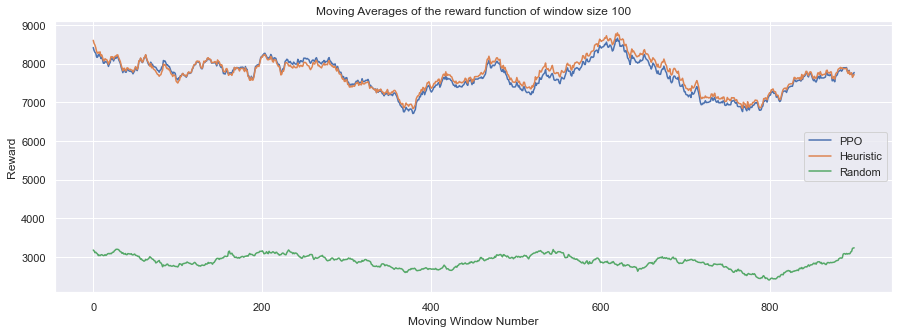

In [89]:
ppo = np.convolve(rewards[:,0],np.ones(100,dtype=int),'valid')/100
heu = np.convolve(rewards[:,1],np.ones(100,dtype=int),'valid')/100
rnd = np.convolve(rewards[:,2],np.ones(100,dtype=int),'valid')/100


fig = plt.figure(figsize=(15,5))
plt.plot(ppo)
plt.plot(heu)
plt.plot(rnd)
plt.title('Moving Averages of the reward function of window size 100')
plt.legend(['PPO', 'Heuristic', 'Random'])
plt.ylabel('Reward')
plt.xlabel('Moving Window Number')

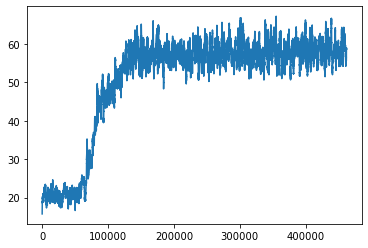

In [13]:
dire = os.path.join('Monitor',"dqn_v_-1oppponents4thTry.monitor.csv")
data = np.genfromtxt(dire, delimiter=",", names=["x", "y", "z"])

c = data['x']
c = np.convolve(c,np.ones(1000,dtype=int),'valid')/1000

plt.plot(c)

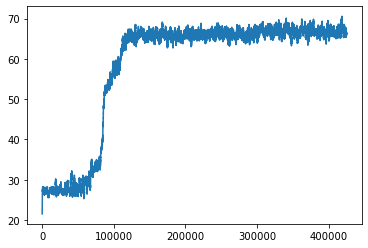

In [14]:
dire = os.path.join('Monitor',"dqn_v_1oppponents4thTry.monitor.csv")
data = np.genfromtxt(dire, delimiter=",", names=["x", "y", "z"])

c = data['x']
c = np.convolve(c,np.ones(1000,dtype=int),'valid')/1000

plt.plot(c)

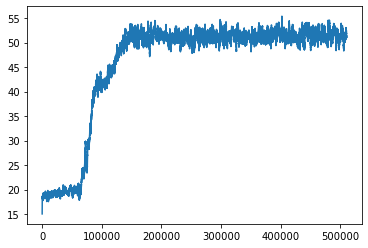

In [15]:
dire = os.path.join('Monitor',"dqn_v_2oppponents4thTry.monitor.csv")
data = np.genfromtxt(dire, delimiter=",", names=["x", "y", "z"])

c = data['x']
c = np.convolve(c,np.ones(1000,dtype=int),'valid')/1000

plt.plot(c)

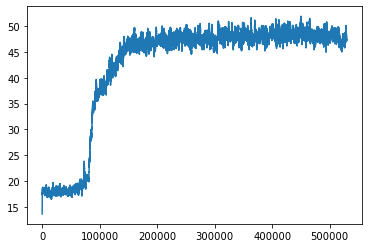

In [16]:
dire = os.path.join('Monitor',"dqn_v_3oppponents4thTry.monitor.csv")
data = np.genfromtxt(dire, delimiter=",", names=["x", "y", "z"])

c = data['x']
c = np.convolve(c,np.ones(1000,dtype=int),'valid')/1000

plt.plot(c)

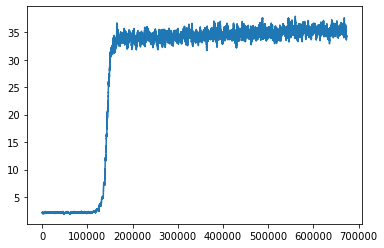

In [17]:
dire = os.path.join('Monitor',"ppo_v_1oppponents4thTry.monitor.csv")
data = np.genfromtxt(dire, delimiter=",", names=["x", "y", "z"])

c = data['x']
c = np.convolve(c,np.ones(1000,dtype=int),'valid')/1000

plt.plot(c)

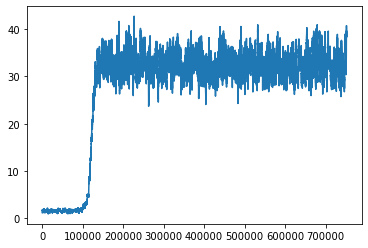

In [18]:
dire = os.path.join('Monitor',"ppo_v_-1oppponents4thTry.monitor.csv")
data = np.genfromtxt(dire, delimiter=",", names=["x", "y", "z"])

c = data['x']
c = np.convolve(c,np.ones(1000,dtype=int),'valid')/1000

plt.plot(c)

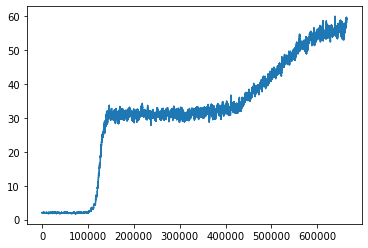

In [21]:
dire = os.path.join('Monitor',"ppo_v_2oppponents4thTry.monitor.csv")
data = np.genfromtxt(dire, delimiter=",", names=["x", "y", "z"])

c = data['x']
c = np.convolve(c,np.ones(1000,dtype=int),'valid')/1000

plt.plot(c)

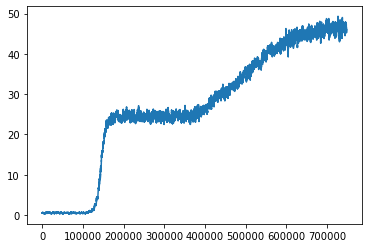

In [22]:
dire = os.path.join('Monitor',"ppo_v_3oppponents4thTry.monitor.csv")
data = np.genfromtxt(dire, delimiter=",", names=["x", "y", "z"])

c = data['x']
c = np.convolve(c,np.ones(1000,dtype=int),'valid')/1000

plt.plot(c)

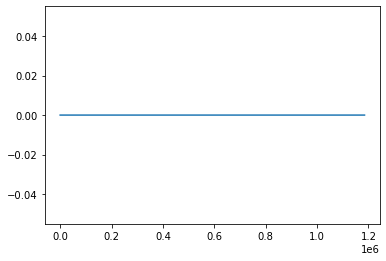

In [11]:
dire = os.path.join('Monitor',"dqn_v_2oppponents_globalRew4thTry.monitor.csv")
data = np.genfromtxt(dire, delimiter=",", names=["x", "y", "z"])

c = data['x']
c = np.convolve(c,np.ones(100,dtype=int),'valid')/100

plt.plot(c)

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
